# Explore here

In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

In [114]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv'
pd.read_csv(url).to_csv('../data/raw/housing.csv', index=False)

In [115]:
df = pd.read_csv("../data/raw/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [116]:
df = df[["MedInc", "Latitude", "Longitude"]]
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


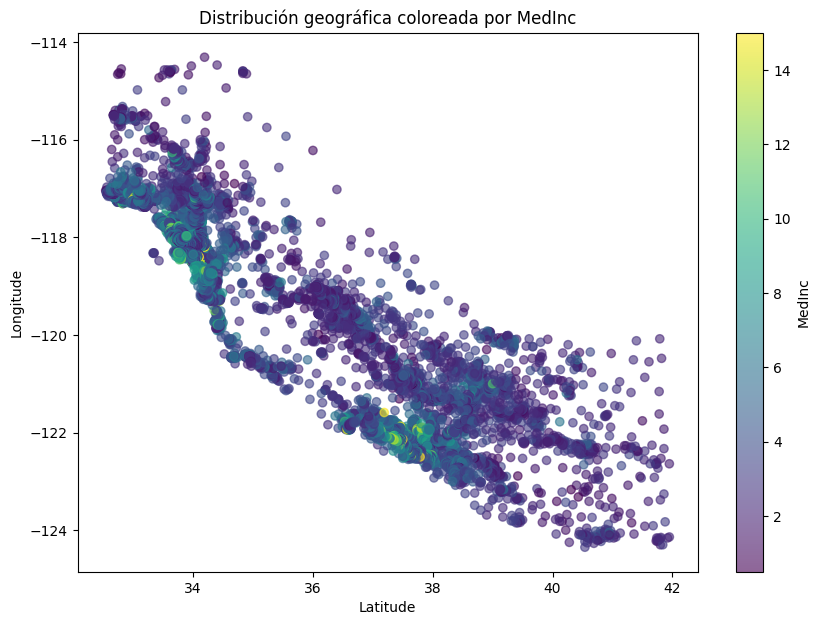

In [117]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df["Latitude"], df["Longitude"], 
                      c=df["MedInc"], cmap="viridis", alpha=0.6)

# Etiquetas y título
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Distribución geográfica coloreada por MedInc")

# Barra de color para interpretar MedInc
cbar = plt.colorbar(scatter)
cbar.set_label("MedInc")

plt.show()

In [118]:
train, test = train_test_split(df, test_size=0.1, random_state=42)

In [119]:
model = KMeans(n_clusters= 6, random_state=42)

model.fit(train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [120]:
centroids = model.cluster_centers_
labels = model.labels_

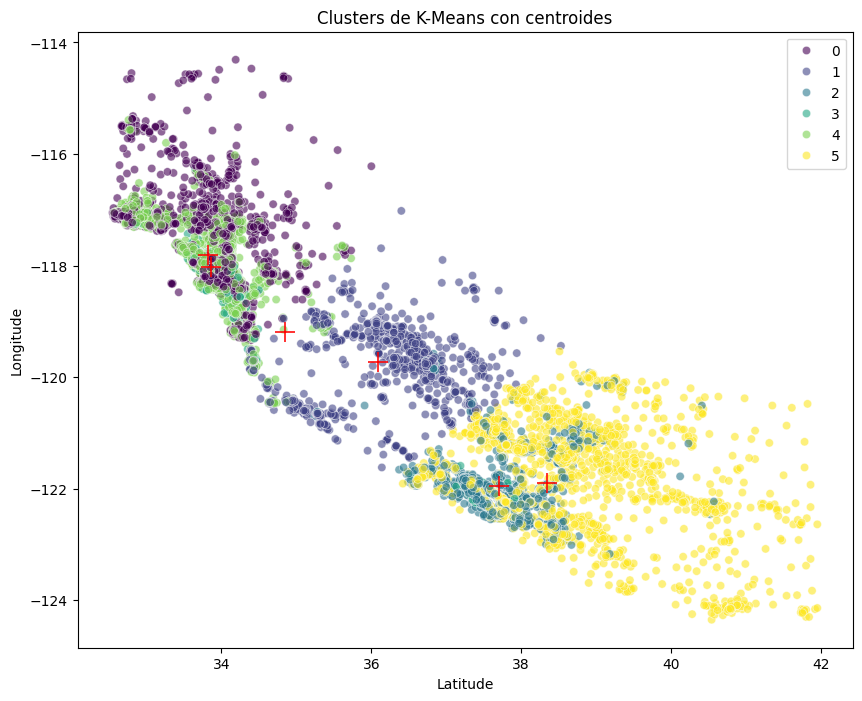

In [121]:
plt.figure(figsize=(10, 8))

# Scatter de los datos con etiquetas de cluster
sns.scatterplot(data=train, x="Latitude", y="Longitude", 
                hue=labels, palette="viridis", alpha=0.6)

# Scatter de los centroides
sns.scatterplot(x=centroids[:, 1], y=centroids[:, 2], 
                color="red", marker="+", s=200)

plt.title("Clusters de K-Means con centroides")
plt.show()

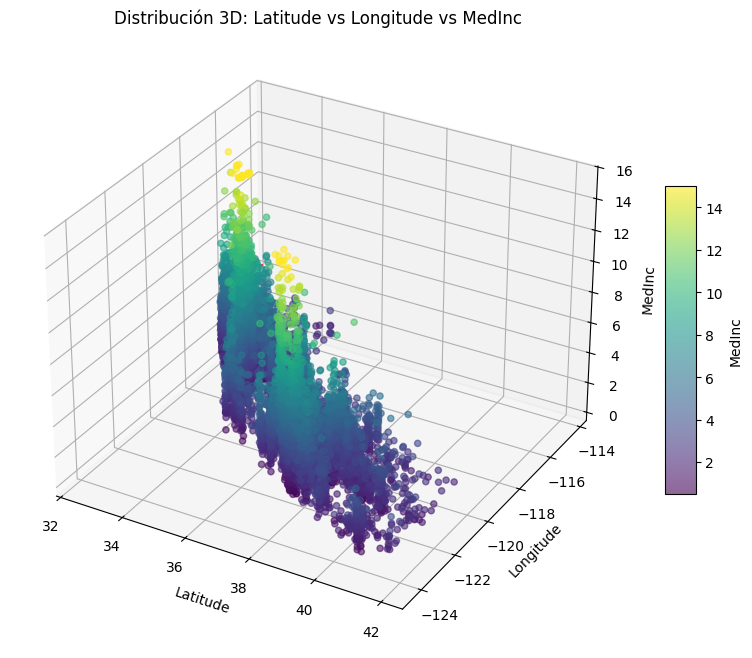

In [123]:

# Crear figura y eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter de datos
scatter = ax.scatter(train["Latitude"], train["Longitude"], train["MedInc"], 
                     c=train["MedInc"], cmap="viridis", alpha=0.6)

# Etiquetas
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("MedInc")
ax.set_title("Distribución 3D: Latitude vs Longitude vs MedInc")
ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 0], 
           color="red", marker="+", s=200)


# Barra de color para interpretar MedInc
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("MedInc")

plt.show()

In [124]:
train["Cluster"] = labels
train.head()

,MedInc,Latitude,Longitude,Cluster
5564,3.8372,33.91,-118.29,0
16016,8.0069,37.73,-122.46,2
17131,3.6712,37.46,-122.15,5
11752,3.1583,38.76,-121.21,5
2308,4.9292,36.83,-119.75,1
